<a href="https://colab.research.google.com/github/ianzin30/IF1014-Mining/blob/main/Nomao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# CRISP_DM PHASE 1
Entendimento

https://docs.google.com/document/d/1__5aHtUM-75B60eRaHWH0kN8GaWUBLRkCMg_DDWnB0E/edit?usp=sharing



# CRISP_DM PHASE 2
Compreensão

## Inicializando dados


In [ ]:
# Executando os imports necessários para rodar o projeto

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

```python
# Comentando essa parte pois estou no VS Code

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import os


# Acquiring features from Nomao
file_path_features = os.path.join(os.getcwd(), "Nomao.features")
with open(file_path_features, 'r') as file:
    content_features = file.read()

# Acquiring data from Nomao
file_path_data = os.path.join(os.getcwd(), "Nomao.data")
with open(file_path_data, 'r') as file:
    content_data = file.read()

# Splitting features and data to create the DataFrame
features = content_features.split('\n')
data = list(map(lambda x: x.split(','), content_data.split('\n')))


### Lendo o dataset 

```python
# Vamos iniciar o Dataframe e printar rapidamente

In [ ]:
# Inicializando DataFrame do Nomao
nomao_df = pd.DataFrame(data, columns=features)
nomao_df.head(5)

,id,clean_name_intersect_min,clean_name_intersect_max,clean_name_levenshtein_sim,clean_name_trigram_sim,clean_name_levenshtein_term,clean_name_trigram_term,clean_name_including,clean_name_equality,city_intersect_min,...,coordinates_long_levenshtein,coordinates_long_trigram,coordinates_long_equality,coordinates_lat_diff,coordinates_lat_levenshtein,coordinates_lat_trigram,coordinates_lat_equality,geocode_coordinates_diff,coordinates_diff,label
0,0#1,1,1,1,1,1,1,s,s,?,...,0.75,0.5,n,0.999953002209,0.777777777778,0.461538463831,n,1.0,0.999999996702,+1
1,0#2,1,0.75,0.857143,0.857143,0.894737,0.947368,s,n,?,...,0.5,0.307692319155,n,0.999982921892,0.538461538462,0.4375,n,1.0,0.999999962459,+1
2,0#3,1,1,1,1,1,1,s,s,?,...,0.666666666667,0.461538463831,n,0.999992600055,0.8,0.666666686535,n,1.0,0.999999999653,+1
3,4#5,1,0.75,0.857143,0.857143,0.842105,0.833333,s,n,1,...,0.5,0.285714298487,n,0.998604948886,0.555555555556,0.384615391493,n,0.999999947284,0.999994124065,+1
4,6#7,0,0,0.25,0,0.25,0,n,n,?,...,?,?,m,?,?,?,m,1.0,?,+1


## Entendendo melhor os dados do Nomao



Segundo o arquivo de informação do desafio da Nomao, é informado que:

" First 29,104 instances have been labeled with "human prior".

Next 917 instances have been labeled using the active learning method called "marg".

Next 964 instances refer to the active method called "wmarg".

Next 995 instances refer to the active method called "wmarg5".

Next 1,985 instances refer to the active method called "rand" (random selection).

Next 163 instances refer to the active method called "baseline".

Next 167 instances refer to the active method called "nomao".

And last 170 instances refer to the active method called "tsun". "


### Quantidade de registros e colunas

```python

# Apenas para entender como é composto o dataframe em termos de linhas e colunas

In [ ]:
print(nomao_df.shape)


(34466, 120)


In [ ]:
nomao_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34466 entries, 0 to 34465
Columns: 120 entries, id to label
dtypes: object(120)
memory usage: 31.6+ MB


### Análise
```python
# Podemos ver que o método "info", nos diz que existem 34466 linhas e 120 features, um arquivo bem grande e que condiz com o que foi informado pelo desafio.




### Pré-processamento
```python
# Podemos então começar com o pré processamento de dados, verificando duplicatas, linhas com informações faltantes, inconcistência.

# Vale ressaltar que no arquivo .names, é informado como é catégorizado dados incompletos, "?"

In [ ]:
nomao_df.duplicated().sum()

0

```python
# Observamos que não existem linhas duplicadas no dataset.


In [ ]:
print(nomao_df.dtypes.to_frame(name="Dtype"))


                                            Dtype
id                                         object
clean_name_intersect_min                   object
clean_name_intersect_max                   object
clean_name_levenshtein_sim                 object
clean_name_trigram_sim                     object
clean_name_levenshtein_term                object
clean_name_trigram_term                    object
clean_name_including                       object
clean_name_equality                        object
city_intersect_min                         object
city_intersect_max                         object
city_levenshtein_sim                       object
city_trigram_sim                           object
city_levenshtein_term                      object
city_trigram_term                          object
city_including                             object
city_equality                              object
zip_intersect_min                          object
zip_intersect_max                          object


In [ ]:
print(nomao_df.dtypes.value_counts())


object    120
Name: count, dtype: int64


### Separando a coluna de label e estudando balanceamento de classes

In [ ]:
# Separando a coluna de label
label_col = nomao_df['label']
nomao_df = nomao_df.drop(columns=['label'])


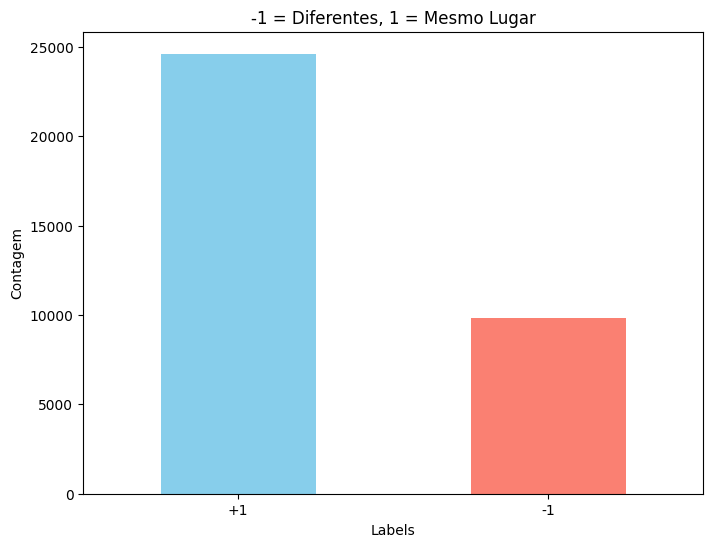

In [ ]:
import matplotlib.pyplot as plt

# Plotting the class distribution
plt.figure(figsize=(8,6))
label_col.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('-1 = Diferentes, +1 = Mesmo Lugar')
plt.xlabel('Labels')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.show()




Agora, vamos voltar para o motivo pelo qual todas as colunas estão sendo tratadas como tipo `object`. Isso de dá devido à presença de caracteres não numéricos, como o símbolo `?`, que é utilizado para representar valores ausentes nos dados. Isso impede que o Pandas interprete essas colunas como numéricas. 

In [ ]:
# Não é necessário rodar, mas é interessante para ver a quantidade de NaN em cada coluna do Dataset
pd.set_option('display.max_rows', None)

In [ ]:
nomao_df.replace("?", pd.NA, inplace=True) # Irei transformar todos os valores "?" com o padrão de Missing value de Pandas.
x = nomao_df.isna().sum()
x.sort_values(ascending=False)
# Tem muita coluna com MUITOS valores em NaN.


fax_trigram                                  33570
fax_levenshtein                              33570
fax_diff                                     33570
website_levenshtein_sim                      32289
website_intersect_max                        32289
website_trigram_term                         32289
website_levenshtein_term                     32289
website_intersect_min                        32289
website_trigram_sim                          32289
countryname_intersect_min                    28798
countryname_intersect_max                    28798
countryname_levenshtein_sim                  28798
countryname_trigram_sim                      28798
countryname_levenshtein_term                 28798
countryname_trigram_term                     28798
zip_levenshtein_sim                          25111
zip_trigram_term                             25111
zip_levenshtein_term                         25111
zip_trigram_sim                              25111
zip_intersect_max              

In [343]:
# Separar as colunas numéricas e não numéricas
num_cols = nomao_df.select_dtypes(include=['float64', 'int64']).columns
non_num_cols = nomao_df.select_dtypes(exclude=['float64', 'int64']).columns

# Aplicar pd.to_numeric nas colunas numéricas (coerção)
nomao_df[num_cols] = nomao_df[num_cols].apply(pd.to_numeric, errors='coerce')

# Substituir NaNs pelas medianas nas colunas numéricas
nomao_df[num_cols] = nomao_df[num_cols].fillna(nomao_df[num_cols].median())

# Contar quantas colunas numéricas ainda possuem pelo menos um NaN
num_nan_cols = (nomao_df[num_cols].isna().sum() > 0).sum()
print(f"Quantidade de colunas numéricas com NaN: {num_nan_cols}")

# Excluir 'id' coluna das não numéricas para evitar que ela se torne dummy
non_num_cols_without_id = non_num_cols[non_num_cols != 'id']

# Converter variáveis categóricas para dummies (exceto 'id')
nomao_df_dummies = pd.get_dummies(nomao_df[non_num_cols_without_id])

# Concatenar colunas numéricas e dummies de volta em um único DataFrame
nomao_df_final = pd.concat([nomao_df[['id'] + list(num_cols)], nomao_df_dummies], axis=1)

# Verificar o DataFrame final
print(nomao_df_final.head())


Quantidade de colunas numéricas com NaN: 0
    id  clean_name_intersect_min_0  clean_name_intersect_min_0.125  \
0  0#1                       False                           False   
1  0#2                       False                           False   
2  0#3                       False                           False   
3  4#5                       False                           False   
4  6#7                        True                           False   

   clean_name_intersect_min_0.142857  clean_name_intersect_min_0.166667  \
0                              False                              False   
1                              False                              False   
2                              False                              False   
3                              False                              False   
4                              False                              False   

   clean_name_intersect_min_0.2  clean_name_intersect_min_0.25  \
0                  

In [344]:
# Remover colunas com mais de 50% de NaNs
nomao_df = nomao_df.dropna(thresh=0.90*len(nomao_df), axis=1)

# Verificar novamente os NaNs
print(nomao_df.isna().sum())


id                                             0
clean_name_intersect_min                       1
clean_name_intersect_max                       1
clean_name_levenshtein_sim                     1
clean_name_trigram_sim                         1
clean_name_levenshtein_term                    1
clean_name_trigram_term                        1
clean_name_including                           1
clean_name_equality                            1
city_including                                 1
city_equality                                  1
zip_including                                  1
zip_equality                                   1
street_including                               1
street_equality                                1
website_including                              1
website_equality                               1
countryname_including                          1
countryname_equality                           1
geocoderlocalityname_intersect_min           540
geocoderlocalityname

In [345]:
# Exibir as colunas com mais de 500 NaNs diretamente
columns_with_many_nans = nomao_df.isna().sum()
columns_with_many_nans = columns_with_many_nans[columns_with_many_nans > 0]  # Exibindo colunas com mais de 500 NaNs
print(columns_with_many_nans)


clean_name_intersect_min                       1
clean_name_intersect_max                       1
clean_name_levenshtein_sim                     1
clean_name_trigram_sim                         1
clean_name_levenshtein_term                    1
clean_name_trigram_term                        1
clean_name_including                           1
clean_name_equality                            1
city_including                                 1
city_equality                                  1
zip_including                                  1
zip_equality                                   1
street_including                               1
street_equality                                1
website_including                              1
website_equality                               1
countryname_including                          1
countryname_equality                           1
geocoderlocalityname_intersect_min           540
geocoderlocalityname_intersect_max           540
geocoderlocalityname

In [346]:
# Encontrar colunas com valores NaN
columns_with_nans = nomao_df.columns[nomao_df.isna().sum() > 0]

# Substituir NaNs pela mediana nas colunas com valores ausentes
nomao_df[columns_with_nans] = nomao_df[columns_with_nans].fillna(nomao_df[columns_with_nans].median())

# Verificar se todos os NaNs foram substituídos
print(nomao_df.isna().sum())


TypeError: could not convert string to float: 's'